<a href="https://colab.research.google.com/github/GabrieleKasputyte/Duomenu-gavyba/blob/main/Suicide%20Data%20Analysis/umap_saliu_klasteriai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sutvarkytu duomenu mortd tyrimas

In [1]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/mortd.csv"
mortd = pd.read_csv(url,encoding="latin")

In [23]:
mortd

,Country,Year,PmortBoth,PmortMale,PmortFemale,RSuicBoth,RSuicMale,RSuicFemale,CY,"Population ages 0-14, female (% of female population)","Population ages 0-14, male (% of male population)","Population ages 10-14, female (% of female population)","Population ages 10-14, male (% of male population)","Population ages 15-19, female (% of female population)","Population ages 15-19, male (% of male population)","Population ages 20-24, female (% of female population)","Population ages 20-24, male (% of male population)","Population ages 25-29, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 30-34, male (% of male population)","Population ages 35-39, female (% of female population)","Population ages 35-39, male (% of male population)","Population ages 40-44, female (% of female population)","Population ages 40-44, male (% of male population)","Population ages 45-49, female (% of female population)","Population ages 45-49, male (% of male population)","Population ages 50-54, female (% of female population)","Population ages 50-54, male (% of male population)","Population ages 55-59, female (% of female population)","Population ages 55-59, male (% of male population)","Population ages 60-64, female (% of female population)","Population ages 60-64, male (% of male population)","Population ages 65-69, female (% of female population)","Population ages 65-69, male (% of male population)","Population ages 70-74, female (% of female population)","Population ages 70-74, male (% of male population)","Population ages 75-79, female (% of female population)","Population ages 75-79, male (% of male population)","Population ages 80 and above, female (% of female population)","Population ages 80 and above, male (% of male population)","Population, female","Population, male"
0,Afghanistan,2019.0,35.3,34.4,36.2,4.1,4.6,3.6,Afghanistan 2019,42.59679246,42.35420188,13.51315874,13.38952152,11.87149113,11.88710933,9.961009138,9.988106849,7.741214767,7.94343925,6.14755378,6.430479033,5.155172069,5.29074984,4.097513887,4.272471397,3.262040954,3.326697808,2.620193463,2.612504517,2.064522367,2.02930128,1.6002621,1.501782385,1.20763093,1.063440365,0.891814674,0.689697301,0.460695018,0.377240296,0.322093255,0.232778472,18512029,19529725
1,Afghanistan,2018.0,35.4,34.7,36.0,4.1,4.6,3.5,Afghanistan 2018,43.22341557,42.96393194,13.57990725,13.4743477,11.88151655,11.87172207,9.813102903,9.859701253,7.582571906,7.837661079,6.105887428,6.367722526,5.081775258,5.235556218,4.029398062,4.195035857,3.222141152,3.27310843,2.587544283,2.582500862,2.041979483,1.999985021,1.578980644,1.480932086,1.218991509,1.050733505,0.862531355,0.677864707,0.449181611,0.370218618,0.320982291,0.233325824,18079105,19093281
2,Afghanistan,2017.0,35.5,35.0,35.9,4.1,4.6,3.4,Afghanistan 2017,43.82367254,43.54888233,13.6297315,13.54231198,11.89814673,11.85496879,9.633427011,9.718139919,7.437189011,7.743829946,6.086427857,6.313574668,4.998468045,5.180118899,3.968176151,4.116269662,3.189747115,3.229221984,2.557349681,2.557668795,2.023596975,1.97209037,1.561499844,1.464755628,1.238593513,1.040714969,0.824387674,0.666545679,0.444555882,0.363425126,0.314761978,0.229793236,17644266,18652134
3,Afghanistan,2016.0,35.6,35.1,36.0,4.0,4.4,3.6,Afghanistan 2016,44.42952369,44.12317396,13.68265497,13.60327056,11.89263175,11.82541216,9.436873642,9.575249214,7.309121394,7.656152523,6.066154556,6.262706195,4.914487841,5.121429083,3.912710338,4.041739938,3.160786958,3.192578169,2.530135728,2.53542724,2.007550113,1.947215686,1.552235824,1.452450031,1.255237109,1.032226656,0.786884929,0.65588079,0.441863513,0.356282077,0.303802609,0.222076282,17196083,18187045
4,Afghanistan,2015.0,35.6,35.4,35.7,4.0,4.3,3.6,Afghanistan 2015,45.06469222,44.69956349,13.74243406,13.65860187,11.84026579,11.77183907,9.238713618,9.440355813,7.201288518,7.571510976,6.027594066,6.210430231,4.836473155,5.057246438,3.862325113,3.97571

In [4]:
#mortd_m_melted=pd.melt(mortd_m, id_vars=['Country','Year'], var_name='Gender',value_name='Drate')

## Cia grafikas parodo RSuicBoth kitima pagal metus naudojam mortd duomenu masyva

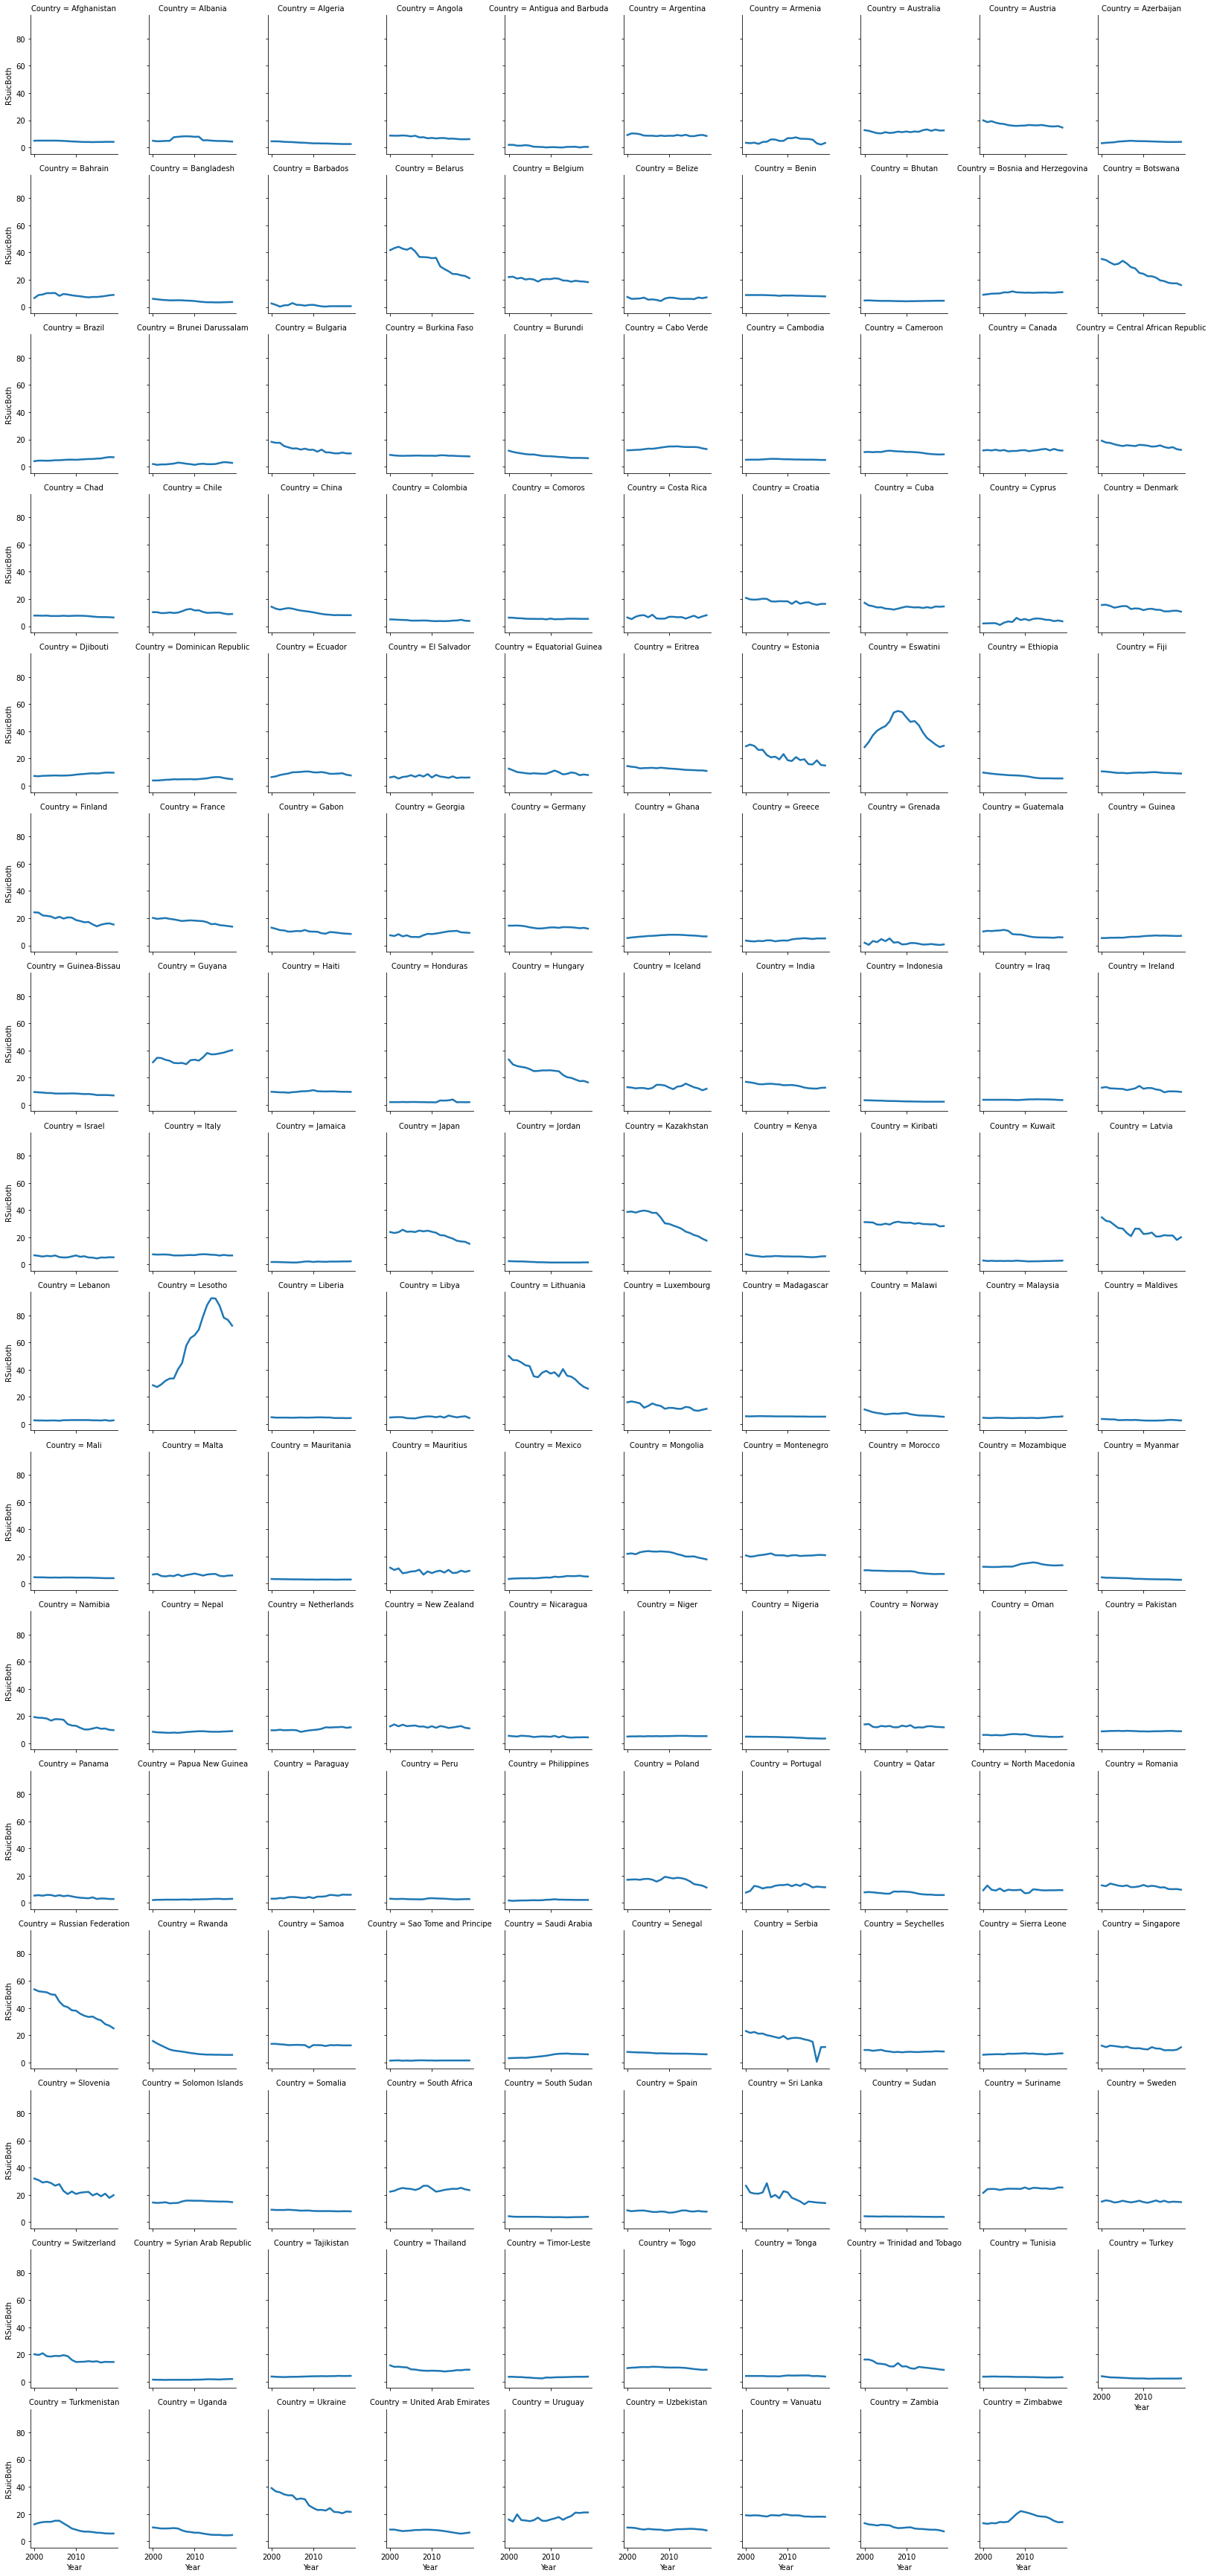

In [17]:
import seaborn as sns

mortd['Year']=mortd['Year'].astype(float)
mortd['RSuicBoth']=mortd['RSuicBoth'].astype(float)

sns.relplot(x="Year", y="RSuicBoth", col="Country", col_wrap=10,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=mortd);
#len(np.unique(mortd['Country']))

## Cia pabandom umap kad sugrupuoti salis pagal tendencijas per metus. Mums reikes pasigaminti tesingus kintamuosius.


In [5]:
# Both Genders
mortd_cyb=mortd[['Country','Year','RSuicBoth']].copy() # country year RSuicBoth
mortd_cyb_reshaped=mortd_cyb.pivot(index='Country',columns='Year',values='RSuicBoth')
mortd_cyb_reshaped=mortd_cyb_reshaped.astype(float)

# Males
mortd_cym=mortd[['Country','Year','RSuicMale']].copy() # country year RSuicMale
mortd_cym_reshaped=mortd_cym.pivot(index='Country',columns='Year',values='RSuicMale')
mortd_cym_reshaped=mortd_cym_reshaped.astype(float)

# Females
mortd_cyf=mortd[['Country','Year','RSuicFemale']].copy() # country year RSuicFemale
mortd_cyf_reshaped=mortd_cyf.pivot(index='Country',columns='Year',values='RSuicFemale')
mortd_cyf_reshaped=mortd_cyf_reshaped.astype(float)

In [7]:
mortd_cyb_reshaped

Year,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.9,5.0,5.0,5.0,5.0,5.0,4.9,4.8,4.6,4.4,4.3,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1
Albania,4.9,4.5,4.6,4.8,4.8,7.5,7.8,8.1,8.2,8.1,7.8,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3
Algeria,4.5,4.5,4.4,4.1,4.0,3.9,3.7,3.5,3.4,3.2,3.0,3.0,2.9,2.9,2.8,2.7,2.6,2.5,2.5,2.5
Angola,8.7,8.6,8.6,8.8,8.6,8.1,8.6,7.4,7.5,6.7,7.0,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1
Antigua and Barbuda,1.9,1.9,1.3,1.3,1.7,1.3,0.5,0.4,0.3,0.0,0.2,0.2,0.0,0.0,0.4,0.4,0.5,0.0,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,16.0,14.5,19.8,15.6,15.3,14.8,15.5,17.4,15.1,15.0,16.0,16.8,17.8,15.8,17.4,18.6,21.1,20.8,21.2,21.2
Uzbekistan,10.1,10.0,9.7,9.0,8.6,9.1,8.8,8.6,8.5,8.0,8.1,8.5,8.9,8.9,9.0,9.2,9.1,8.8,8.6,8.0
Vanuatu,19.1,18.9,19.1,19.0,18.6,18.2,19.2,19.1,18.9,19.8,19.5,19.0,19.1,18.9,18.2,18.2,18.0,18.1,18.1,18.0


In [ ]:
mortd_cyf_reshaped.loc['Afghanistan',:] # how to take one row

## Taikom umap pamatyti kokia yra struktura. Mums reikės susižymėti taškus. Taip pat reikėtų pavaizduoti su PCA ir su dendrograma

In [8]:
!pip install umap-learn

     |████████████████████████████████| 81kB 5.0MB/s 
     |████████████████████████████████| 1.2MB 15.7MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-cp37-none-any.whl size=76569 sha256=d3b114e57381b63a82e1f00faabc7592c7918f6255639f800e4ea2d3de299d20
  Stored in directory: /root/.cache/pip/wheels/ad/df/d5/a3691296ff779f25cd1cf415a3af954b987fb53111e3392cf4
  Created wheel for pynndescent: filename=pynndescent-0.5.2-cp37-none-any.whl size=51351 sha256=d092bd2175cb927de0bd69848d0b9671ea417ba314568832feaa81a37c341bb6
  Stored in directory: /root/.cache/pip/wheels/ba/52/4e/4c28d04d144a28f89e2575fb63628df6e6d49b56c5ddd0c74e
Successfully built umap-learn pynndescent


In [9]:
import umap
import matplotlib.pyplot as plt

reducerb=umap.UMAP(random_state=0)
reducerm=umap.UMAP(random_state=0)
reducerf=umap.UMAP(random_state=0)



## Sukurkime dataframe is embedding

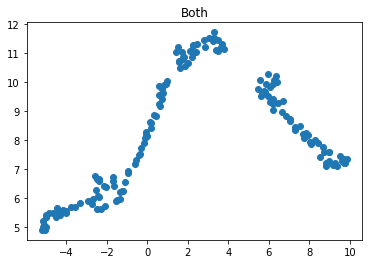

In [11]:
#plt.figure(figsize=(40,40))
embeddingb = reducerb.fit_transform(mortd_cyb_reshaped)
plt.scatter( embeddingb[:, 0], embeddingb[:, 1])
plt.title("Both")
umap_RSuicBoth=pd.DataFrame(data=embeddingb, index=mortd_cyb_reshaped.index, columns=['x','y'])

## Atrinkime klasterius kurie yra aiskus, neaisku are nepavyks todel kad truputi keiciasi kiekviena karta

In [ ]:
# Cia blogi sleksciai
#umap_RSuicBoth_1=umap_RSuicBoth[umap_RSuicBoth['x']>8].sort_values(by='x')
#umap_RSuicBoth_2=umap_RSuicBoth[(umap_RSuicBoth['x']>4.5) & (umap_RSuicBoth['x']<8) ].sort_values(by='x')
#umap_RSuicBoth_3=umap_RSuicBoth[(umap_RSuicBoth['x']<4.5) ].sort_values(by='y')
#pd.set_option('display.max_rows', 80)

## Paziurekime kas gaunasi vyrams atskirai ir moterims atskirai

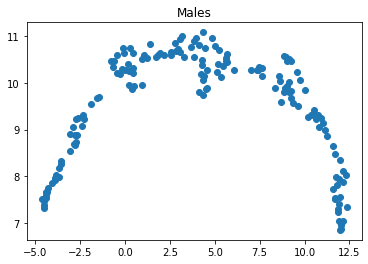

In [10]:
embeddingm = reducerm.fit_transform(mortd_cym_reshaped)
#plt.figure(figsize=(40,40))
plt.scatter( embeddingm[:, 0], embeddingm[:, 1])
plt.title("Males")
umap_RSuicMales=pd.DataFrame(data=embeddingm, index=mortd_cym_reshaped.index, columns=['males_x','males_y'])

## Kas gaunasi moterims atskirai

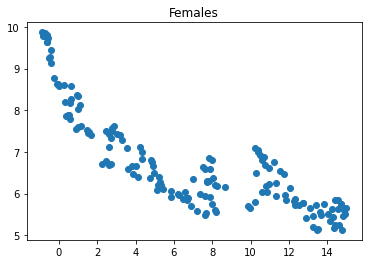

In [12]:
embeddingf = reducerf.fit_transform(mortd_cyf_reshaped)
plt.scatter( embeddingf[:, 0], embeddingf[:, 1])
plt.title("Females")
umap_RSuicFemales=pd.DataFrame(data=embeddingf, index=mortd_cyf_reshaped.index, columns=['females_x','females_y'])

## Apjunkim visus umap atvaizdavimus

In [13]:
umap1=pd.DataFrame.merge(umap_RSuicBoth,umap_RSuicMales,left_index=True, right_index=True)
umap_isuic=pd.DataFrame.merge(umap1, umap_RSuicFemales,left_index=True, right_index=True)

In [14]:
umap_isuic

,x,y,males_x,males_y,females_x,females_y
Country,,,,,,
Afghanistan,-2.382033,6.641619,11.570339,8.652362,6.908455,5.705636
Albania,-0.290867,7.710455,8.691574,9.595605,6.990319,6.356956
Algeria,-3.765101,5.693362,12.322648,8.018686,2.747051,7.579628
Angola,0.597448,9.556451,4.335208,10.066586,4.347033,7.005946
Antigua and Barbuda,-5.194851,4.905444,12.016613,6.873884,-0.734135,9.851405
...,...,...,...,...,...,...
Uruguay,7.537380,8.477610,-2.607242,9.246941,11.514397,6.534753
Uzbekistan,2.272040,11.286984,3.826005,10.551414,7.997259,6.793099
Vanuatu,7.850484,8.243344,-2.867976,9.065930,12.042015,6.134382


## Kas gaunasi kad mes apjungem? Aiskiai matosi du klasteriai ir juose dar kelios smulkios strukturos. 

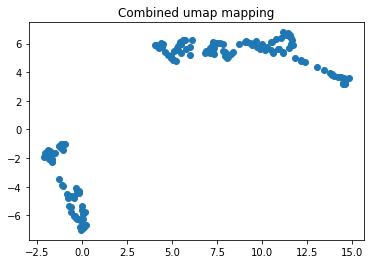

In [15]:
reducerc=umap.UMAP(random_state=0)
embeddingc = reducerc.fit_transform(umap_isuic)
plt.scatter( embeddingc[:, 0], embeddingc[:, 1])
plt.title("Combined umap mapping")
umap_isuic_combined=pd.DataFrame(data=embeddingc, index=umap_isuic.index, columns=['X','Y'])


Pabandykim isskirti saliu grupes

In [21]:
# Pagal slenkscius
umap_isuic_combined_1=umap_isuic_combined[umap_isuic_combined['Y']<0].sort_values(by='X')
umap_isuic_combined_2=umap_isuic_combined[umap_isuic_combined['Y']>0].sort_values(by='X')

#umap_RSuicBoth_2=umap_RSuicBoth[(umap_RSuicBoth['x']>4.5) & (umap_RSuicBoth['x']<8) ].sort_values(by='x')
pd.set_option('display.max_rows', 160)
umap_isuic_combined_1.to_csv("Salys1.csv",index=True)

In [22]:
pd.set_option('display.max_rows', 160)
umap_isuic_combined_2.to_csv("Salys2.csv",index=True)

# Toliau - atsirinkus salis pagal naturalu grupavimasi reikia toliau isanalizuoti kuo jos panasios- kaip jos panasios pagal populiacijos struktura. Bandykime isryskinti panasumus braizydami dendrogramas ir bandydami grupuoti pagal populiacijos struktura ir savizudybiu skirtumus tarp vyru ir moteru. 

# PALIKTA SONE DALIS. Skaiciuojam Regresijos lygti Savizudybiu skaiciui pagal metus: abi lytys, vyrai, moterys, saugom abu parametrus ir R2 - modelio gerumo iverti 

Zr pavyzdi kaip vaizduoti https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py

In [ ]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

countries=[]
b0Both=[]
b1Both=[]
r2Both=[]
b0Males=[]
b1Males=[]
r2Males=[]
b0Females=[]
b1Females=[]
r2Females=[]

regr=LinearRegression()

for i in np.unique(mortd['Country']):
  countries.append(i)
  x=np.array(mortd[mortd['Country']==i]['Year'])
  X=x.reshape(-1,1)
  yB=np.array(mortd[mortd['Country']==i]['RSuicBoth'])
  yM=np.array(mortd[mortd['Country']==i]['RSuicMale'])
  yF=np.array(mortd[mortd['Country']==i]['RSuicFemale'])
  # fit LR
  # Both
  regr.fit(X,yB)
  b0Both.append(regr.intercept_)
  b1Both.append(regr.coef_[0])
  y_pred=regr.predict(X)
  r2=r2_score(yB,y_pred)
  r2Both.append(r2)
  print("Country ",i," R2= ",r2)
  # fit LR
  # Males
  regr.fit(X,yM)
  b0Males.append(regr.intercept_)
  b1Males.append(regr.coef_[0])
  y_pred=regr.predict(X)
  r2=r2_score(yM,y_pred)
  r2Males.append(r2)
  print("Country ",i," R2= ",r2)
  # fit LR
  # Females
  regr.fit(X,yF)
  b0Females.append(regr.intercept_)
  b1Females.append(regr.coef_[0])
  y_pred=regr.predict(X)
  r2=r2_score(yF,y_pred)
  r2Females.append(r2)
  print("Country ",i," R2= ",r2)
  
mortd_LR=pd.DataFrame(data={'Country': countries, 'Bintercept': b0Both, 'Bcoef': b1Both, 'Br2': r2Both, 'Mintercept': b0Males, 'Mcoef': b1Males, 'Mr2': r2Males, 'Fintercept': b0Females, 'Fcoef': b1Females, 'Fr2': r2Females })



Country  Afghanistan  R2=  0.8220157226036866
Country  Afghanistan  R2=  0.6313741002620598
Country  Afghanistan  R2=  0.9474975740186072
Country  Albania  R2=  0.036515873265171805
Country  Albania  R2=  0.06436451277999367
Country  Albania  R2=  0.015600127490663196
Country  Algeria  R2=  0.9609720926698609
Country  Algeria  R2=  0.967219537677943
Country  Algeria  R2=  0.9431165601907402
Country  Angola  R2=  0.9050452388447364
Country  Angola  R2=  0.9104076367690415
Country  Angola  R2=  0.8140078978556811
Country  Antigua and Barbuda  R2=  0.583353637827769
Country  Antigua and Barbuda  R2=  0.7521040400948424
Country  Antigua and Barbuda  R2=  0.4703160616473314
Country  Argentina  R2=  0.22793302762643564
Country  Argentina  R2=  0.24183472349058666
Country  Argentina  R2=  0.22242546186208434
Country  Armenia  R2=  0.044259024632361865
Country  Armenia  R2=  0.03726153160304535
Country  Armenia  R2=  0.03570986125208275
Country  Australia  R2=  0.2882421732917687
Country  Aust

In [ ]:
pd.set_option('display.max_rows', 160)
mortd_LR.drop(columns=['Bintercept','Mintercept','Fintercept'],inplace=True)
mortd_LR.sort_values(by='Br2',axis=0,ascending=False).head(n=159)


,Country,Bcoef,Br2,Mcoef,Mr2,Fcoef,Fr2
120,Russian Federation,-1.559098,0.977694,-2.877218,0.977342,-0.387143,0.978908
99,Myanmar,-0.092782,0.968965,-0.107519,0.950024,-0.076842,0.961938
48,Ethiopia,-0.241128,0.962159,-0.293985,0.954053,-0.188195,0.951796
2,Algeria,-0.115940,0.960972,-0.145263,0.967220,-0.089023,0.943117
19,Botswana,-1.093008,0.960935,-1.484286,0.957530,-0.719173,0.886068
125,Senegal,-0.086617,0.949945,-0.130677,0.947897,-0.046015,0.903761
157,Zambia,-0.275639,0.940168,-0.233008,0.888191,-0.316917,0.938468
40,Djibouti,0.152406,0.939245,0.183759,0.905533,0.102256,0.945781
60,Guinea-Bissau,-0.117594,0.938544,-0.193684,0.939889,-0.051880,0.921653
106,Nigeria,-0.082932,0.937718,-0.106992,0.897120,-0.061729,0.956403


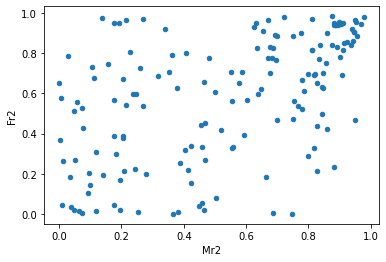

In [ ]:
mortd_LR.plot.scatter(x='Mr2',y='Fr2')


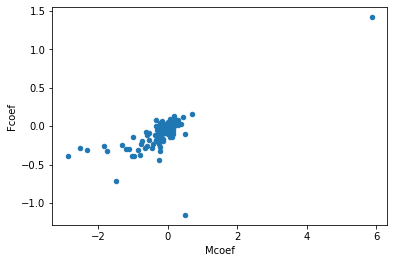

In [ ]:
mortd_LR.plot.scatter(x='Mcoef',y='Fcoef')


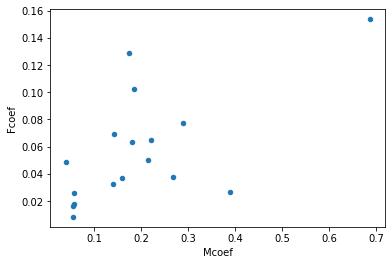

In [ ]:
mortd_increase=mortd_LR[((mortd_LR['Mcoef']>0) & (mortd_LR['Fcoef']>0) & (mortd_LR['Br2']>0.5)) & (mortd_LR['Country']!='Lesotho')]
mortd_increase.plot.scatter(x='Mcoef',y='Fcoef')


In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.scatterplot(data=mortd_increase, x='Mcoef',y='Fcoef')

for i in range(mortd_increase.shape[0]):
   plt.text(x=mortd_increase.Mcoef[i]+0.3,y=mortd_increase.Fcoef[i]+0.3,s=mortd_increase.Country[i],,fontdict=dict(color='red',size=10),bbox=dict(facecolor='yellow',alpha=0.5))